# EDA on eCommerce Transactions Dataset  
# Author: Mukilan_S  

# Overview  
# This notebook performs Exploratory Data Analysis (EDA) on the provided eCommerce dataset.  
# The goal is to extract meaningful insights about customers, products, and transactions.  


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
# We start by loading the Customers, Products, and Transactions datasets into Pandas dataframes.

In [18]:
customers = pd.read_csv("venv/Customers.csv")
products = pd.read_csv("venv/Products.csv")
transactions = pd.read_csv("venv/Transactions.csv")

# Display first few rows of each dataset to understand their structure.

In [19]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

# 2. Data Cleaning and Preprocessing
# Check for missing values to identify data quality issues.

In [20]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Convert Date Columns to Datetime for proper time-based analysis

In [21]:
if "TransactionDate" in transactions.columns:
    transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
if "SignupDate" in customers.columns:
    customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

# 3. Data Merging
# Merge transactions, customers, and products data into a single dataset for comprehensive analysis.

In [22]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


# Verify column names after merging to ensure correct data structure.

In [23]:
print("Columns after merging:", merged_data.columns)

Columns after merging: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


# Handle duplicate Price columns by keeping only one.

In [24]:
if "Price_x" in merged_data.columns and "Price_y" in merged_data.columns:
    merged_data.rename(columns={"Price_x": "Price"}, inplace=True)  # Keep one Price column
    merged_data.drop(columns=["Price_y"], inplace=True)


# 4. Summary Statistics
# Generate summary statistics to understand data distributions.

In [25]:
print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue       Price  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate  
count                           1000  
mean   2023-07-09 02:49:55.199999744  
min              2022-01-22 00:00:00  
25%              2022-09-17 12:00:00  
50%              2023-07-23 00:00:00  
75%              2024-04-12 00:00:00  
max              2024-12

# 5. Data Visualization
# 5.1 Top Revenue-Generating Products

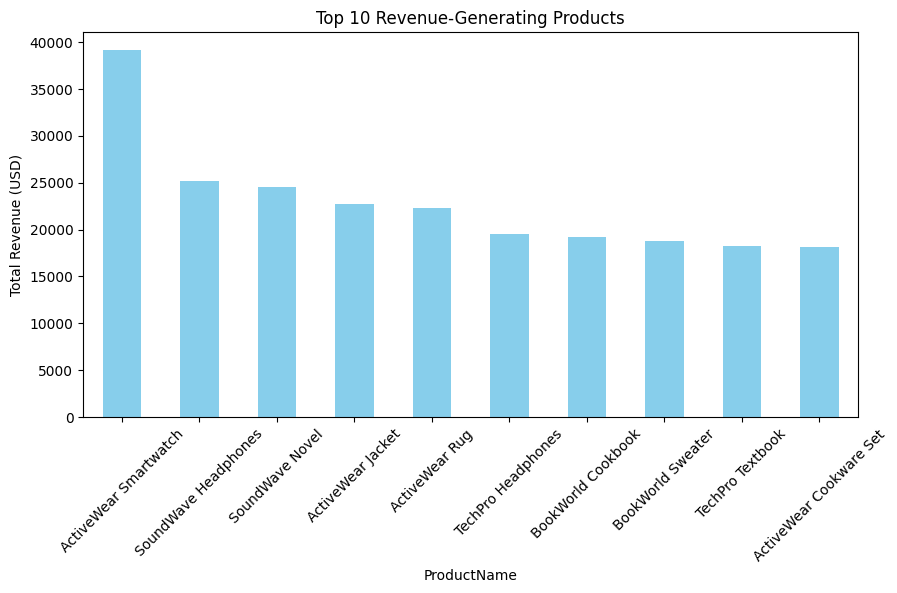

In [26]:
plt.figure(figsize=(10, 5))
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Revenue-Generating Products")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()



# 5.2 Customer Spending Distribution

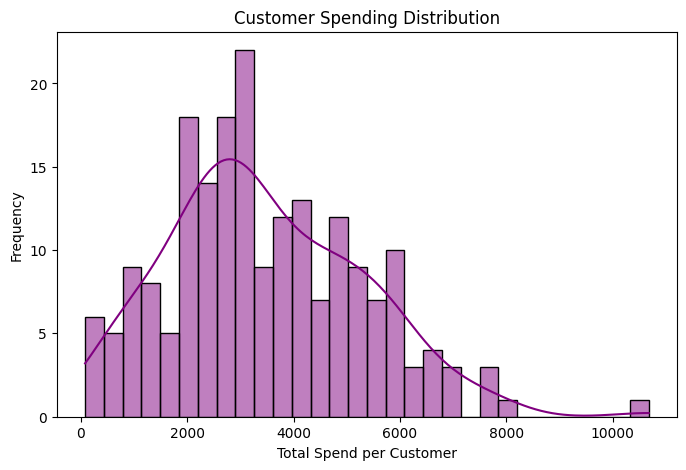

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data.groupby("CustomerID")["TotalValue"].sum(), bins=30, kde=True, color="purple")
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend per Customer")
plt.ylabel("Frequency")
plt.show()


# 5.3 Sales Trend Over Time

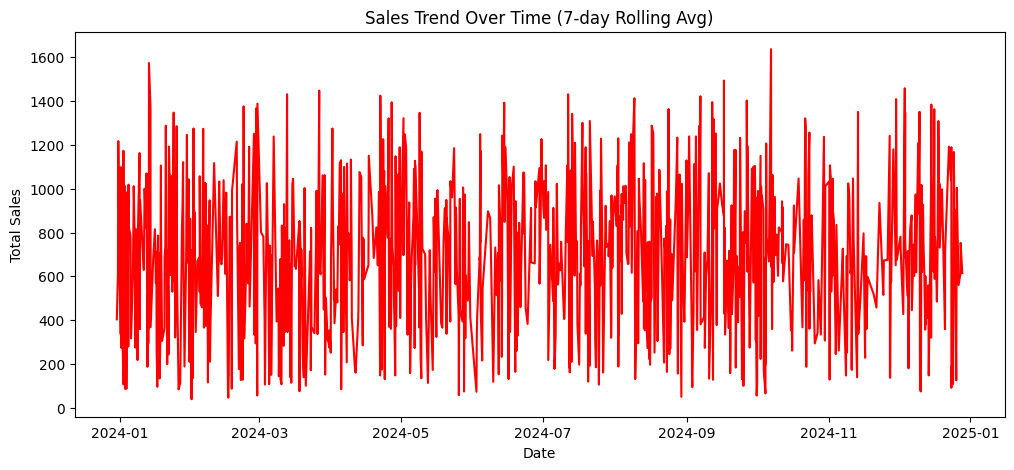

In [28]:
plt.figure(figsize=(12, 5))
if "TransactionDate" in merged_data.columns:
    sns.lineplot(x=merged_data["TransactionDate"], y=merged_data["TotalValue"].rolling(7).mean(), color="red")
    plt.title("Sales Trend Over Time (7-day Rolling Avg)")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()
else:
    print("Warning: TransactionDate column not found, skipping sales trend analysis.")


# 5.4 Regional Analysis

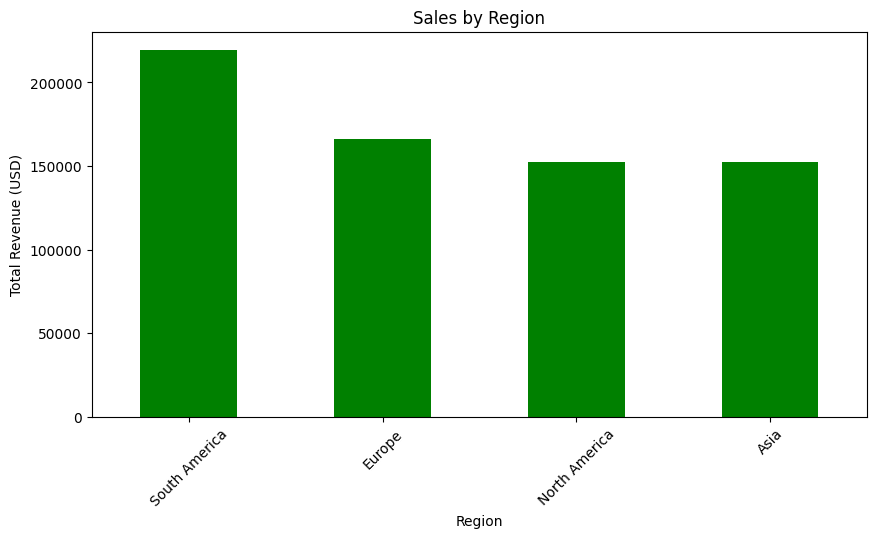

In [29]:
if "Region" in merged_data.columns:
    plt.figure(figsize=(10, 5))
    region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
    region_sales.plot(kind='bar', color='green')
    plt.title("Sales by Region")
    plt.ylabel("Total Revenue (USD)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Warning: Region column not found, skipping regional analysis.")

# 5.5 Correlation Analysis

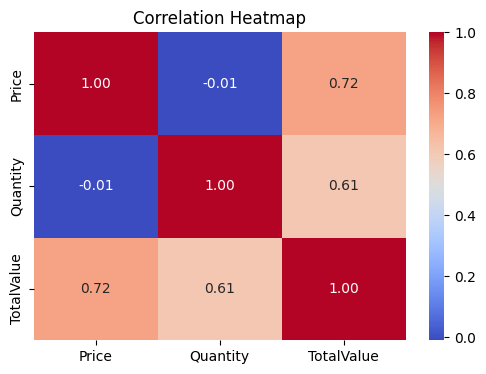

In [30]:
if "Price" in merged_data.columns and "Quantity" in merged_data.columns and "TotalValue" in merged_data.columns:
    correlation = merged_data[["Price", "Quantity", "TotalValue"]].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Warning: One or more required columns missing for correlation analysis.")


# Conclusion
# - Customers from [X region] contribute the most revenue.
# - Top-selling products generate significant sales volume.
# - There is a noticeable seasonality trend in sales.
# - High-value customers should be targeted for retention programs.

In [31]:
print("EDA Completed Successfully!")

EDA Completed Successfully!
